## Bluetooth connection

A bluetooth connection between the computer and epucks is accomplished while running the ubuntu system. Normally I wouldn't go into detail about what stepts I took but keeping the manual in mind I will add the steps. Then this is already read once and tips can be given if the structure is good, the information too extensive or too short etc.

## Manual for bluetooth connection

To accomplish a bluetooth connection, several steps should be taken. First the woriking file should be placed at certain folders:

startAllEpucks5.sh  --> usr/local/bin
 
Also a bootloader should be installed, since the epuck is a bit outdated and doesn't work immediately on a newer computer. This bootloader can be found on: https://www.gctronic.com/doc/index.php/E-Puck under the text header Bootloader.

Last of the file /etc/bluetooth/rfcomm.conf should be edited to a structure that can be seen below:

rfcomm0 {
bind yes;
device 08:00:17:2C:E0:88;
channel 1;
comment "e-puck_0006";
}

The simply way is to transfer it from the old computer and copy it in the newer computer.
Next up the rfcomm should be created. This is done by using the following command:

sudo rfcomm bind 0 10:00:E8:6C:A1:F8 1

In which the 10:00:E8:6C:A1:F8 is the mac adress of the epuck. This can be found in bluetooth settings when you want to pair the epuck or in the file of epuck_bdaddr: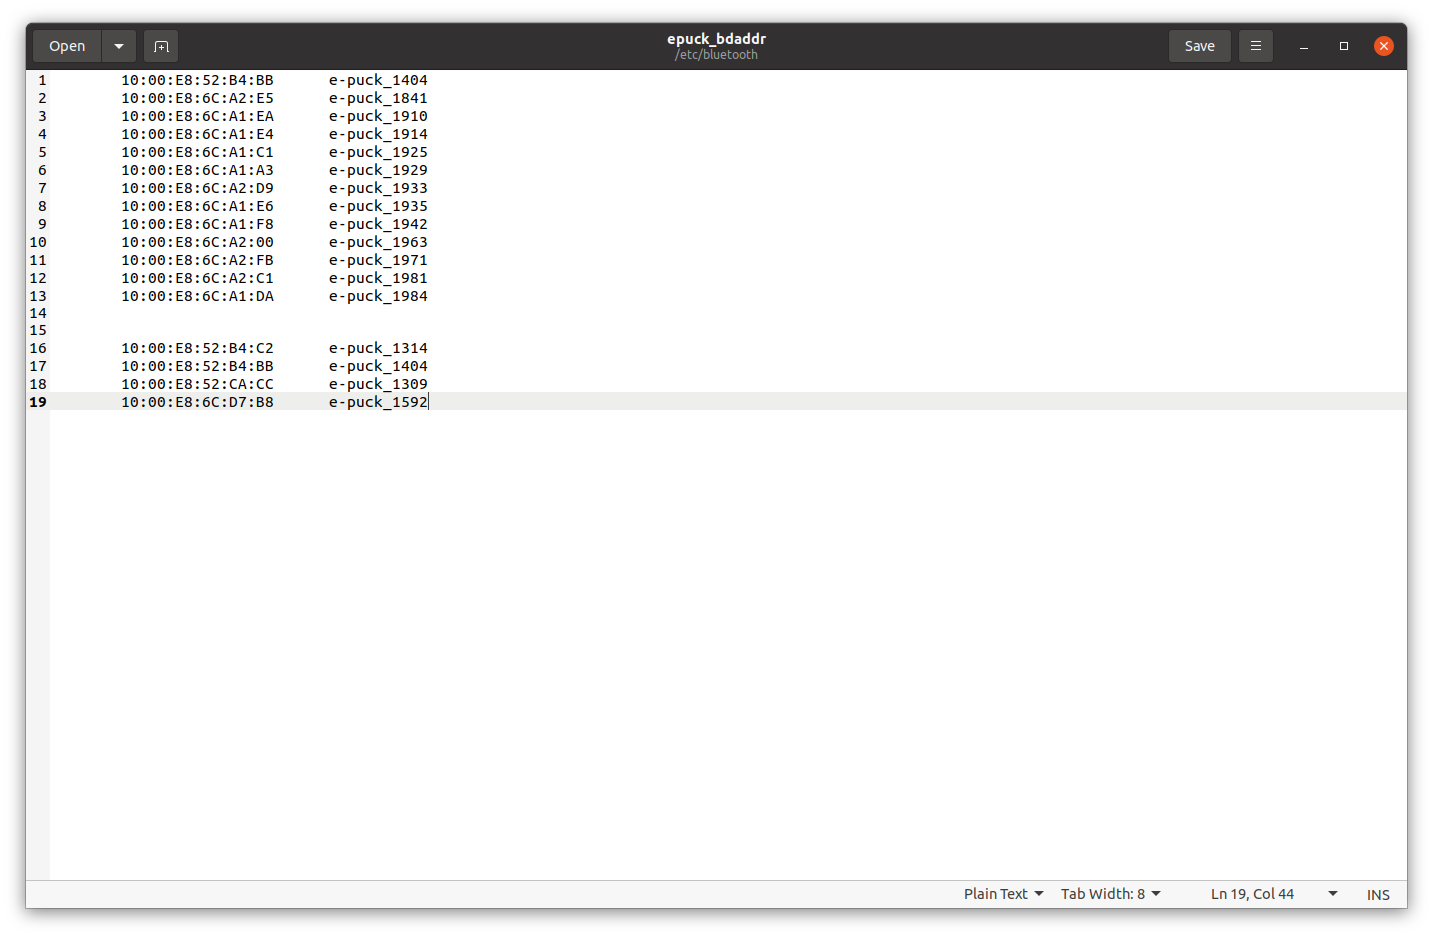. The 0 before the mac adress stands for the rfcomm you want to associate the epuck with. This rfcomm number should be chosen the same as the rfcommXX in the /etc/bluetooth/rfcomm.conf file for the equal mac adress/epuck. The 1 after the mac adress is the the channel on which the epuck should operate, in this case all the epucks operate on channel 1.

The file startAllEpucks5.sh is searching for the link of /opt/epuckXX. This link should be conected to the /dev/rfcommXX file which was made by the rfcomm bind command. The link can be made with the following command:


sudo ln -s /dev/rfcommXX /opt/epuckXX

This was the last step, the computer should be able to make contact with the epuck by running the startAllEpucks5.sh file.

## Getting the camera to work

The error of the profile with no UUID was mainly solved by editing the script. The script is edited from --tab-with-profile DEFAULT to --tab. The change from gnome-terminal to mate-terminal worked in some cases but not all, so I opted for the the tab solution. After this problem was fixed some shared libraries were transfered and symbolic links to some files were made in order to run cameraProxy. However, the camera still didn't work. The library of libdc1934 was transfered from the old computer but it showed that it didn't work. Therefore, I installed the library from its original source. The library was automatically located in the /usr/lib/x86_64 directory.However, this directory was not added to the path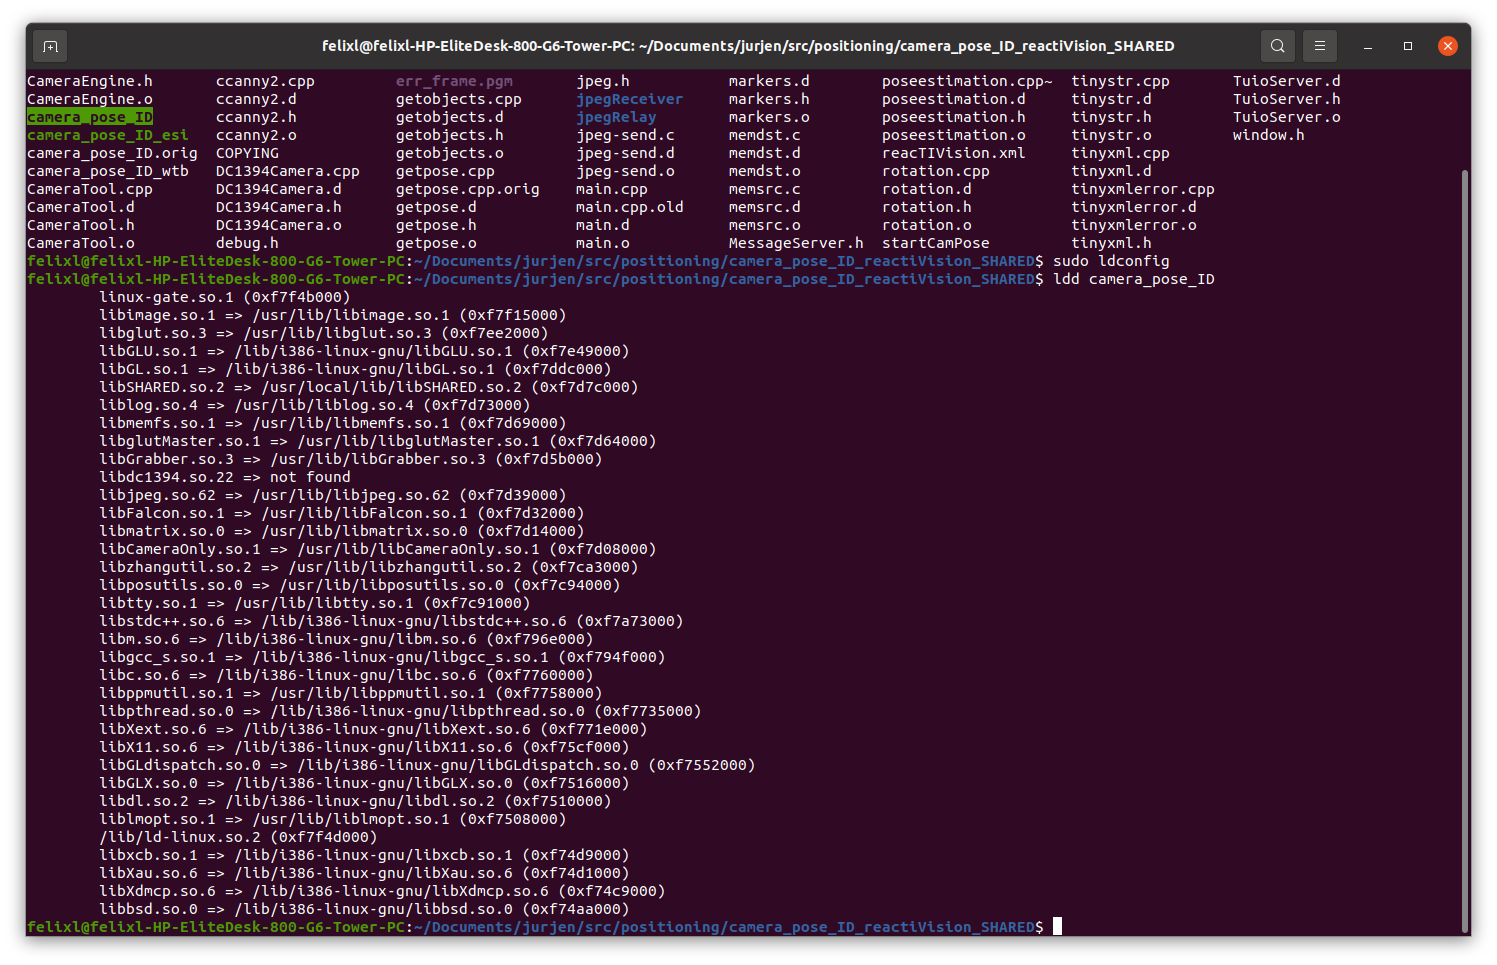

Till now if not been able to get this added to the path. I'm going to explain what I tried. If you guys have any idea how to fix it after reading this let me know! First I tried to add the path of /usr/lib/x86_64 to the ld.so.conf file: 

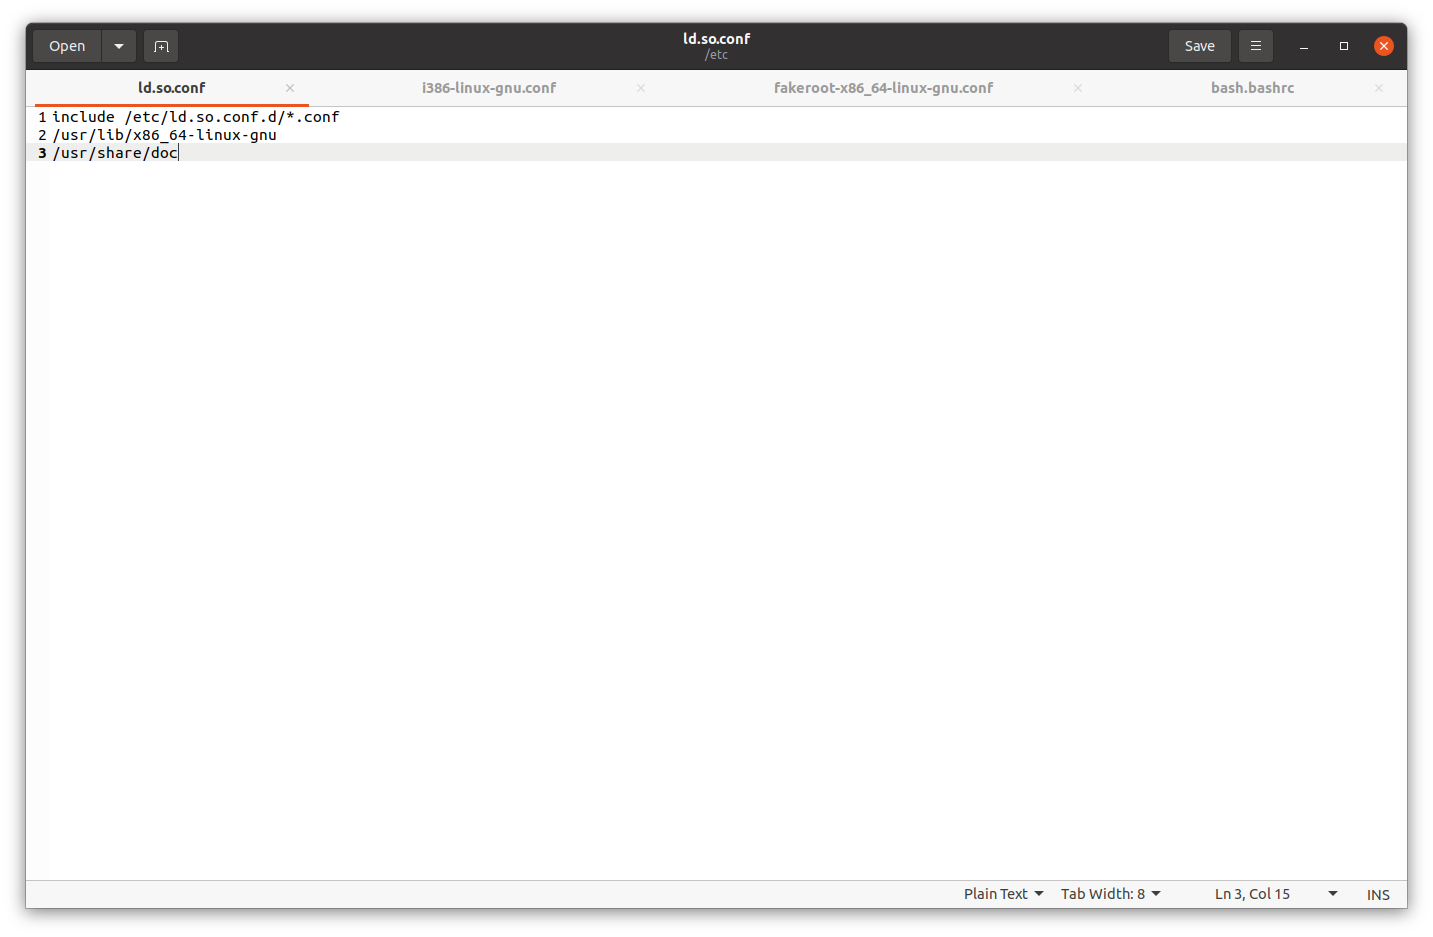

After this I added it to the LD_LIBRARY_PATH: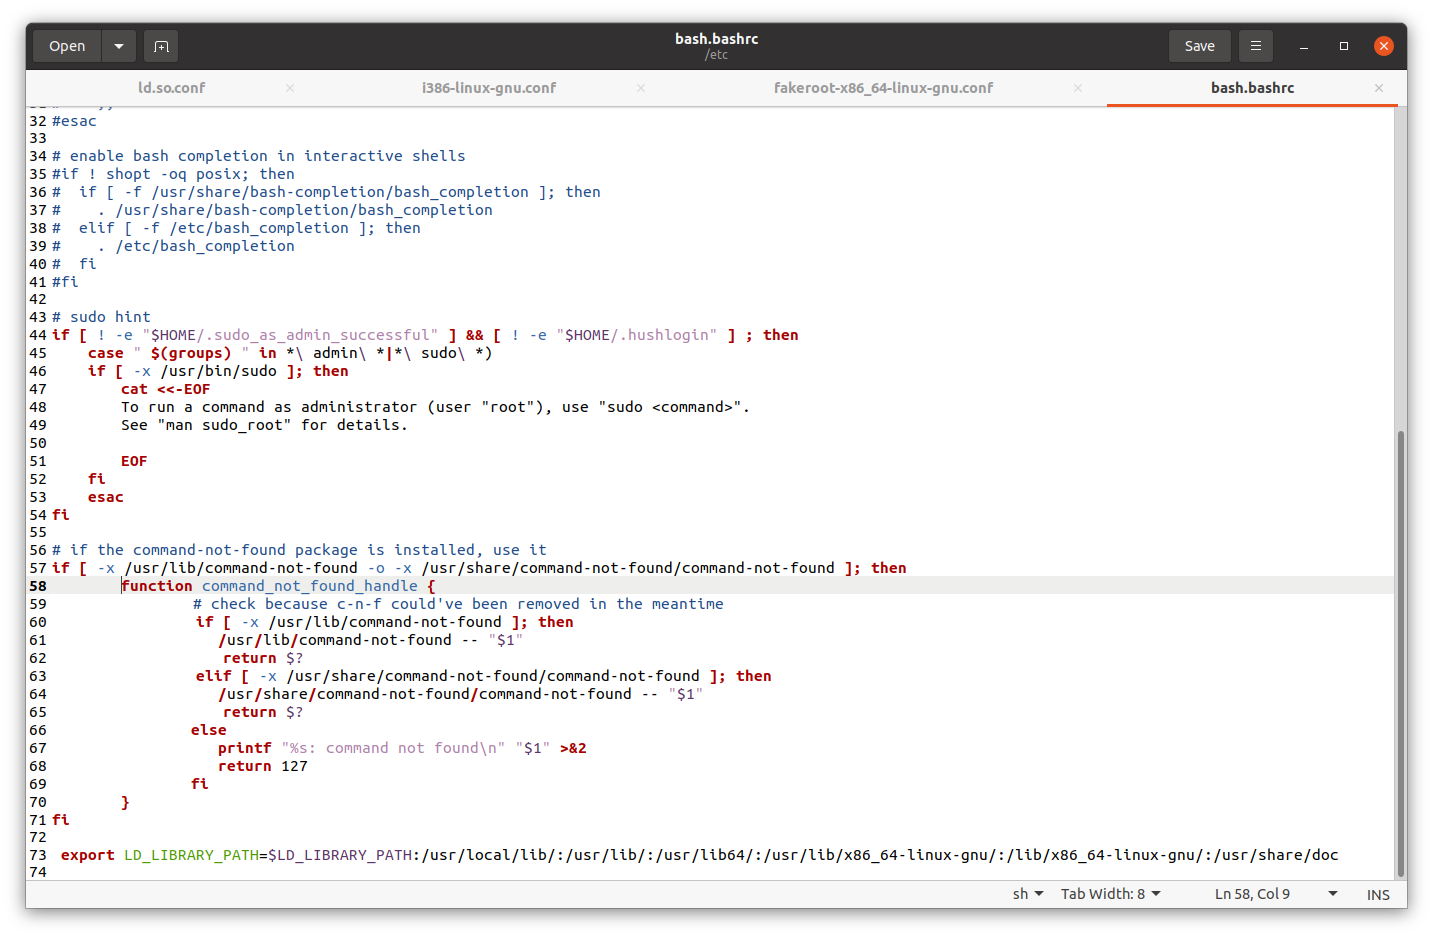. Also I copied the library to the /usr/lib directory. This directory is were I put the rest of the shared libraries and they got added tot the path. However copieng the file to this directory didn't help. Also running the command of ldconfig didn't give more inside in what the problem can be:

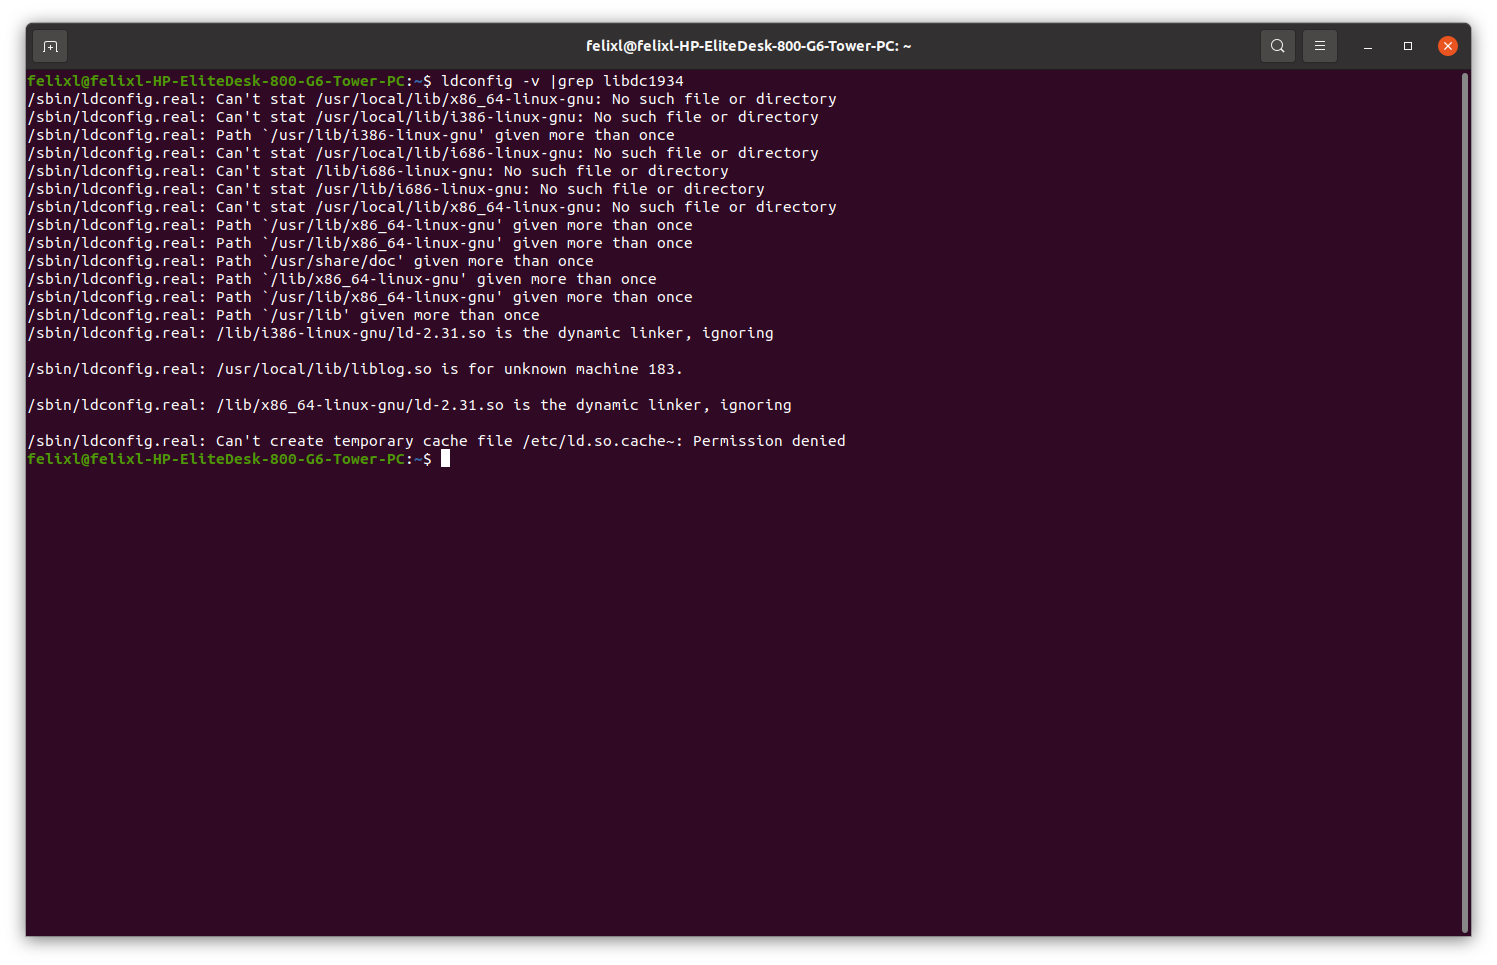
I'm a bit clueless at the moment on how to fix it. Looking at the old computer the library was located in the /home/jurjen/lib directory, so not the automatical point were is wat installed. I'm still figuring out how he did that and how I can do that. The only solution that I could come up with was the copying of the library to a directory I know that is added to the path but as stated above this didn't help. Also I'm a bit careful with messing around and moving the libraries to other places, because last time I did that the linux on my own computer crashed.